# Running notebook

### Magnitude assignment

Run the following cell to assign maximum magnitudes to each segment. This may take ca. 1 hr. 

**This step is not necessary if the pre-processed file `preprocessed_data.csv` already exists in the data folder.**

In [1]:
# %run preprocessing.py

### Define projection parameters

Run one of the following cells to define the Kernel-PCA projections as described in our paper. 

Alternatively, adjust the parameters in the following cell as wanted. Supported inputs are: 
- scaler: `'StandardScaler'`, `'RobustScaler'`, `'MinMaxScaler'`
- kernel: `None`, `'rbf'`, `'cosine'`, `'linear'`, `'poly'`, `'sigmoid'`
- features: any combination of the five features: `'Sed_Thick'`, `'Age'`, `'Dip'`, `'Vel'`, `'Rough'`

In [2]:
# including age, rbf kernel (as shown in paper): 

scaler = 'StandardScaler'
kernel = 'rbf' 

features = ['Sed_Thick', 'Age', 'Dip', 'Vel', 'Rough']

In [3]:
# excluding age, cosine kernel (as shown in paper): 

scaler = 'RobustScaler'
kernel = 'cosine' 

features = ['Sed_Thick', 'Dip', 'Vel', 'Rough']

### Running the projector and generating figures

Run the following cell to run the model and generate figures. This may take a few seconds. 

FeatureUnion(transformer_list=[('Feature processing',
                                ColumnTransformer(remainder='passthrough',
                                                  transformers=[('Imputer',
                                                                 SimpleImputer(),
                                                                 ['Sed_Thick',
                                                                  'Age', 'Dip',
                                                                  'Vel',
                                                                  'Rough'])])),
                               ('PCA projection',
                                Pipeline(steps=[('preprocessing',
                                                 ColumnTransformer(transformers=[('Log. '
                                                                                  'Preprocessor',
                                                                                  Pipeline(steps=[('Imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('Log '
                                                                                                   'Transform',
                                                                                                   LogTransformer()),
                                                                                                  ('Scaler',
                                                                                                   RobustScaler())]),
                                                                                  ['Sed_Thick',
                                                                                   'Dip',
                                                                                   'Rough']),
                                                                                 ('Preprocessor',
                                                                                  Pipeline(steps=[('Imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('Scaler',
                                                                                                   RobustScaler())]),
                                                                                  ['Vel'])])),
                                                ('PCA',
                                                 KernelPCA(kernel='cosine',
                                                           n_components=5,
                                                           random_state=42))]))])

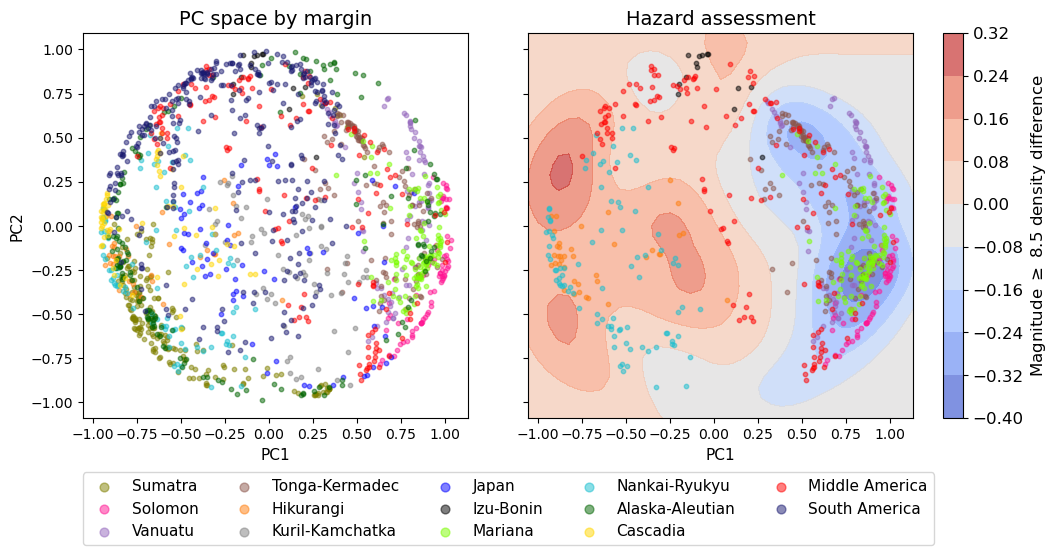

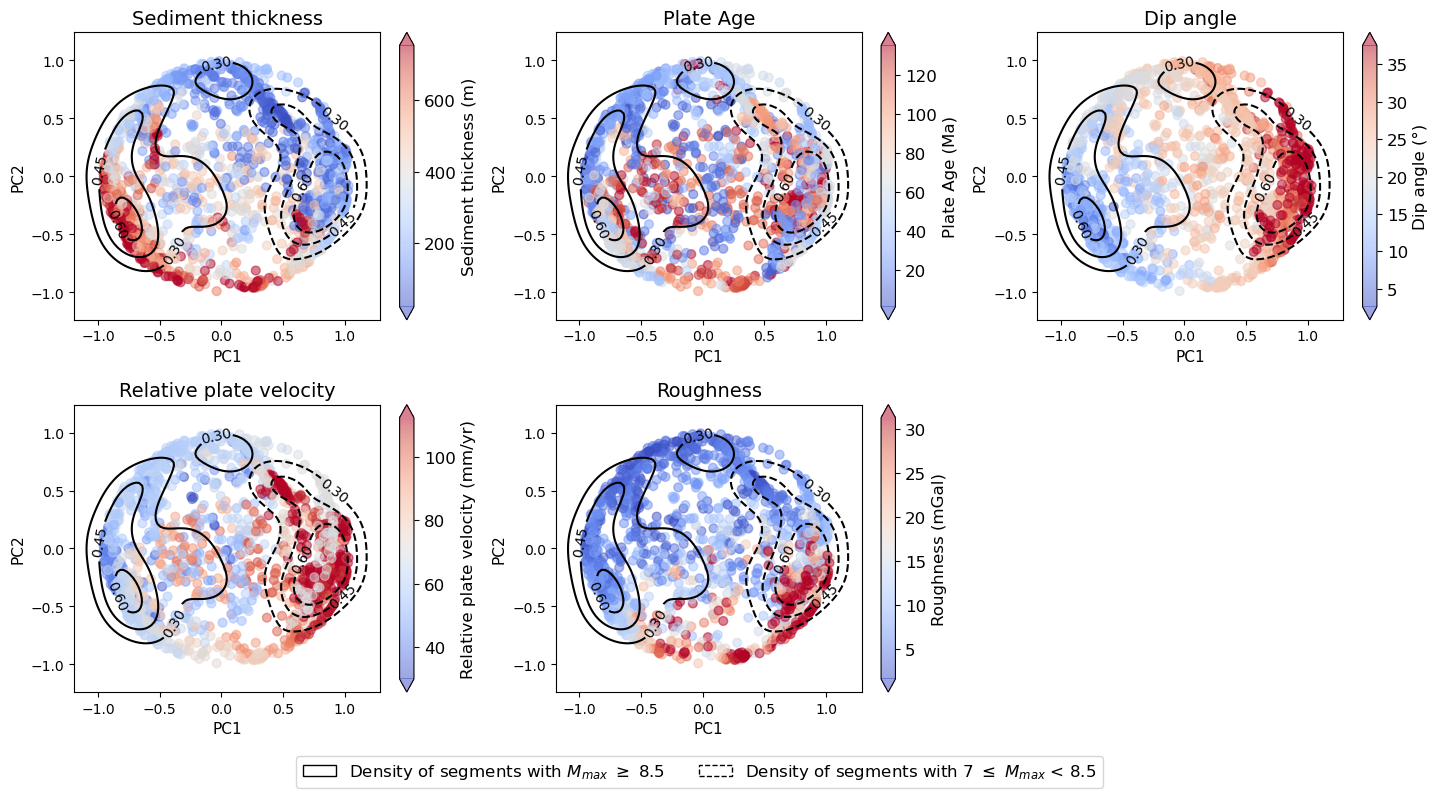

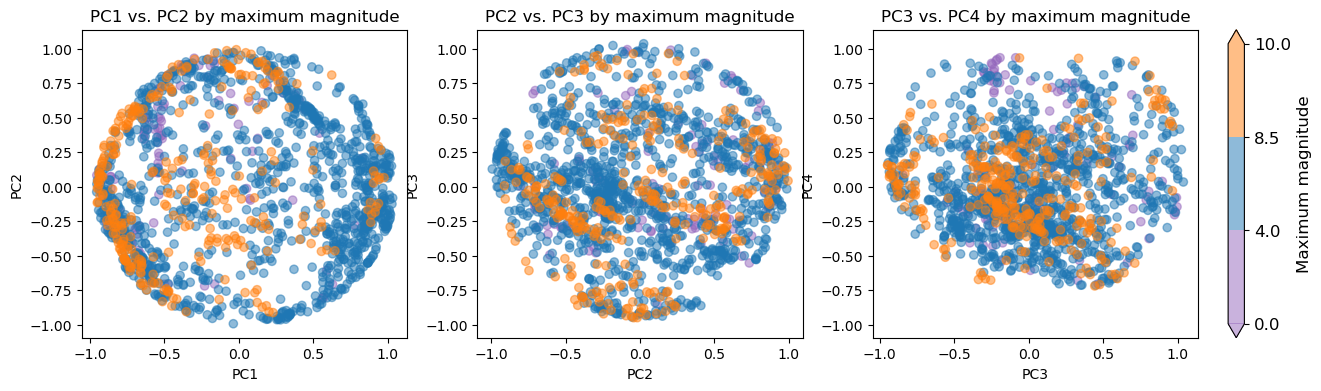

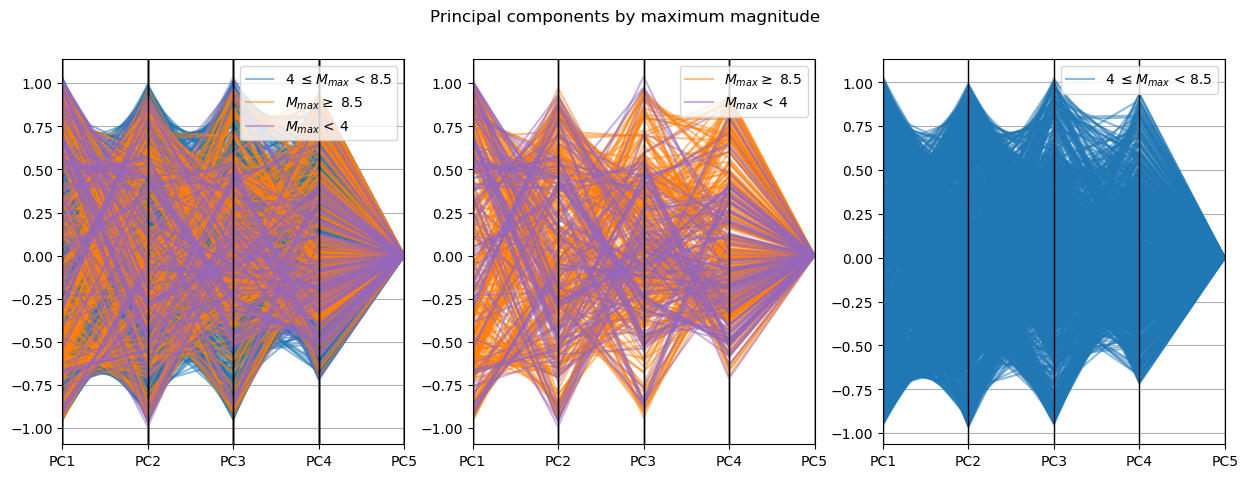

In [4]:
from Projector import Projector

params = {'scaler': scaler, 'kernel': kernel}
projector = Projector(params=params, features=features, generate_figures=True)

projector.get_projector()